In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [17]:
kb=1.38e-23
c=299792458

In [18]:
cane = pd.read_csv("/home/mohan/Downloads/Cane 1979 NGP - Sheet1.csv")

In [19]:
cane

,Freq (MHz),leading,exponent,Unnamed: 3,log(Brightness)
0,0.25,1.4,-22,0,-21.853872
1,0.29,2.9,-22,0,-21.537602
2,0.36,5.8,-22,0,-21.236572
3,0.43,9.0,-22,0,-21.045757
4,0.45,9.9,-22,0,-21.004365
...,...,...,...,...,...
80,81.50,2.3,-21,0,-20.638272
81,110.00,2.6,-21,0,-20.585027
82,175.00,2.5,-21,0,-20.602060
83,178.00,1.6,-21,0,-20.795880


In [21]:
cane['I'] = cane['leading'] * 10.**(cane['exponent'])
# cane['Freq (MHz)'].astype(int)

In [22]:
cane['lambda'] = c/cane['Freq (MHz)']/1e6

In [23]:
cane['Ta'] = 0.5 * cane['I'] * cane['lambda']**2 / kb

In [16]:
with np.load("./brightness.npz") as f:
    lfsm_freqs = f['freqs']
    lfsm_Ta = f['brightness']

Text(0, 0.5, 'log(Ta)')

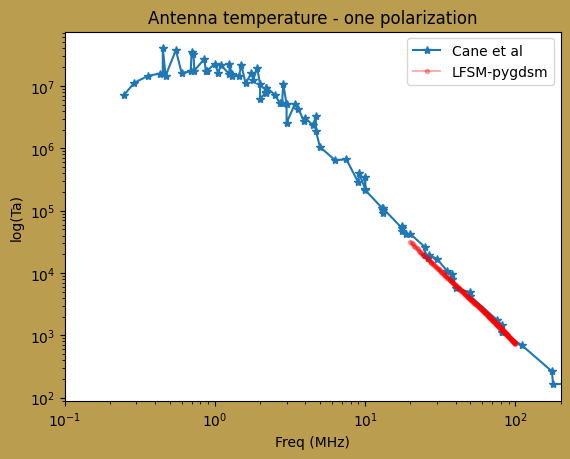

In [75]:
fig,ax=plt.subplots(1,1)
fig.set_facecolor('#ba9d4e')
ax.loglog(cane['Freq (MHz)'], cane['Ta'],'-*',label='Cane et al')
ax.loglog(lfsm_freqs, 0.5*lfsm_Ta,marker='.',c='red',label='LFSM-pygdsm',alpha=0.3) #0.5 bc one pol only
ax.set_xlim(0.1,200)
ax.set_xlim()
plt.legend()
plt.title("Antenna temperature - one polarization")
plt.xlabel("Freq (MHz)")
plt.ylabel("log(Ta)")
# ax.set_ylim(5,8)

(0.1, 200)

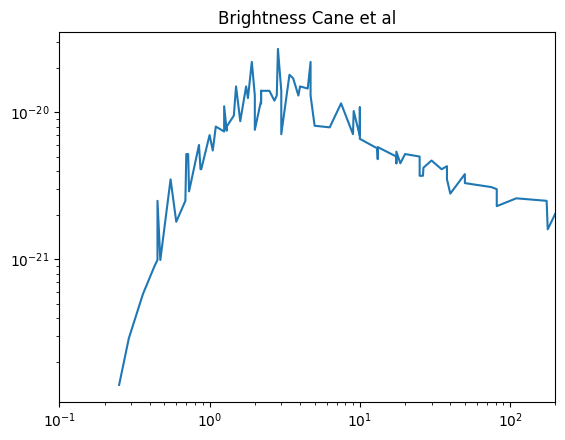

In [24]:
plt.title('Brightness Cane et al')
plt.loglog(cane['Freq (MHz)'], cane['I'])
plt.xlim(0.1,200)

In [131]:
y = np.log10(cane['I'].values[:83].copy())
x = np.log10(cane['Freq (MHz)'][:83].values.copy())

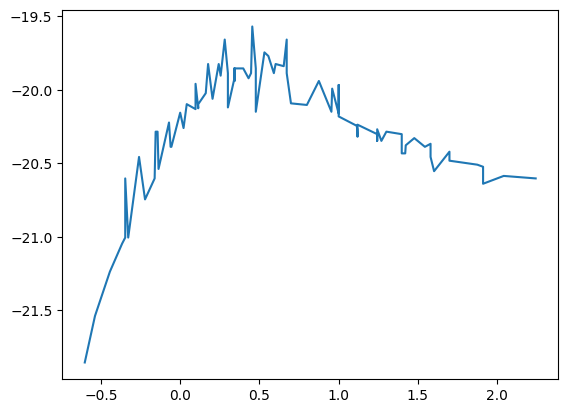

In [133]:
plt.plot(x,y)

In [119]:
def myfunc(x,*params):
    I0 = params[0]
    alpha = params[1]
    c = params[2]
    beta = params[3]
    I1 = params[4]
    gamma = params[5]
    g = I0 * x **(-alpha) * (1 - np.exp(-c * x **(-beta)))/(c * x ** (-beta))
    eg = I1 * x ** (-gamma) * np.exp(-c * x **(-beta))
    return g+eg

In [145]:
def myfunc2(x,*params):
#     x[:] = x - 5
    xx = x.copy()
    xx[:] = xx - params[6]
    I0 = params[0]
    alpha0 = params[1]
    c0 = params[2]
    I1 = params[3]
    alpha1 = params[4]
    c1 = params[5]
    res = -I0 * x**2 / (c0 + np.exp(alpha0 * xx))  - I1 * x / (c1 + np.exp(-alpha1 * xx)) - params[7]
    return res

In [148]:
params = [1.5,1,1,0.5,2,1,5,20]
yfit = myfunc2(x,*params)

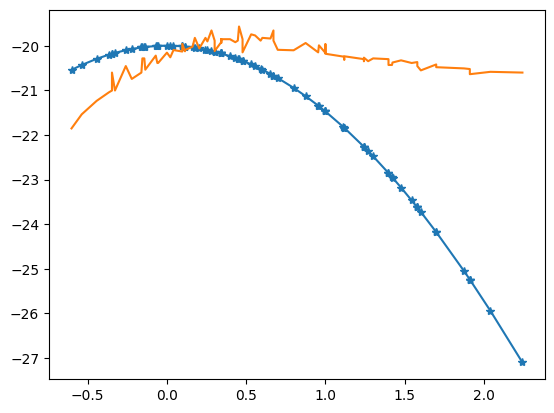

In [149]:
plt.plot(x,yfit, '-*')
plt.plot(x,y)

In [137]:
from scipy.optimize import curve_fit

In [165]:
# curve_fit(myfunc, x, y, [1e6,2.5,5,2.1,1e6,2.8],bounds=(0,np.inf))

params,pcov=curve_fit(myfunc2, x, y, newparams)

In [166]:
params

array([-1.79442803e+02, -4.28903763e+01, -2.71823616e+02, -2.03118244e+05,
        2.39757115e+04,  1.95554651e+05, -1.91120357e+03,  2.03233654e+01])

In [163]:
newparams = [-1.79442803e+02, -4.28903763e+01, -2.71823616e+02, -2.03118244e+05,
        2.39757115e+04,  1.95554651e+05, -1.91120357e+03,  2.03233654e+01]

In [164]:
newparams

[-179.442803,
 -42.8903763,
 -271.823616,
 -203118.244,
 23975.7115,
 195554.651,
 -1911.20357,
 20.3233654]

In [167]:
yfit2 = myfunc2(x,*params)

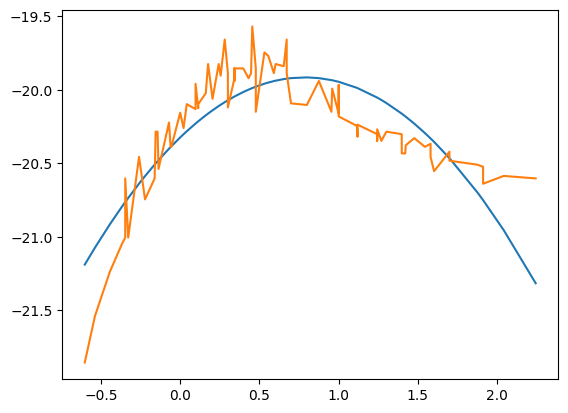

In [168]:
plt.plot(x,yfit2)
plt.plot(x,y)

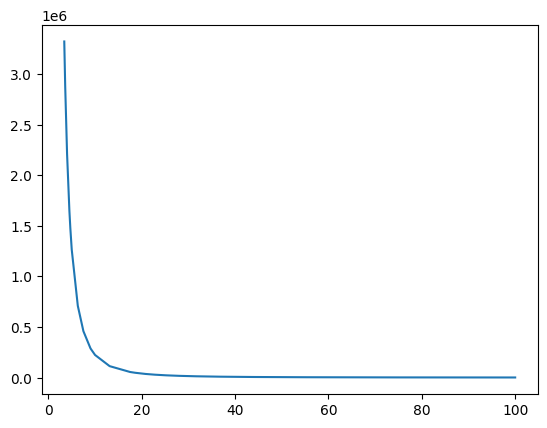

In [183]:
# ypred= myfunc2(x,*params)
ypred=m*x+c
# plt.plot(x,y)
plt.plot(10**x,10**ypred)

In [14]:
def sky_brightness(nu):
    Ig=2.8e-20
    Ieg=1.06e-20
    tau=5*nu**-2.1
    return Ig*nu**-0.52*(1-np.exp(-tau))/tau + Ieg*nu**-0.8*np.exp(-tau)

In [15]:
freqs = np.linspace(1e-6,40,20480)*1e6
sb=sky_brightness(freqs)


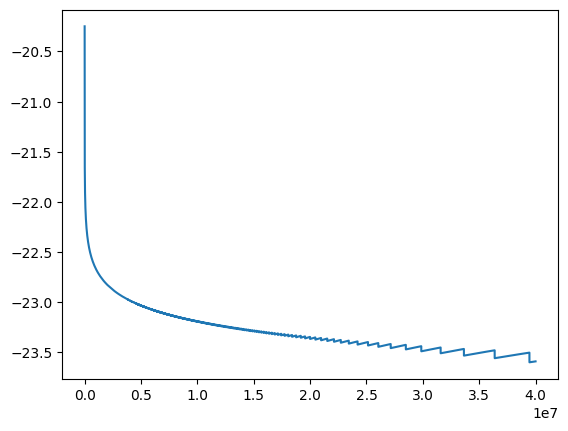

In [16]:
plt.plot(freqs,np.log10(sb))